<a href="https://colab.research.google.com/github/Shrusti23/EE258_neural-networks/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install keras-tqdm
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
!pip install tensorflow-probability
!pip install -U tensorflow==1.15
!pip install tensorflow.compat.v1
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K
from keras.utils.vis_utils import plot_model 
!pip install tf-nightly

from keras_tqdm import TQDMNotebookCallback 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
#tf.disable_v1_behavior()




2.2.0-rc3
     |████████████████████████████████| 412.3MB 43kB/s 
     |████████████████████████████████| 512kB 41.8MB/s 
     |████████████████████████████████| 3.8MB 50.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=c4244d9846c093286b1534373a95134469502ed103fa7f36b77ee46af52a6b78
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing i

ERROR: Could not find a version that satisfies the requirement tensorflow.compat.v1 (from versions: none)
ERROR: No matching distribution found for tensorflow.compat.v1


Using TensorFlow backend.


     |████████████████████████████████| 520.4MB 22kB/s 
     |████████████████████████████████| 2.9MB 42.3MB/s 
     |████████████████████████████████| 460kB 59.4MB/s 
ERROR: tensorflow 1.15.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2


ImportError: ignored

In [1]:
# Loading the data
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



11493376/11490434 [==============================] - 1s 0us/step


2


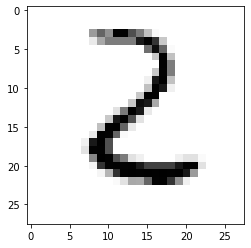

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# You may select anything up to 60,000
image_index = 5908

print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')



In [0]:
#reshaping the input data
x_train.shape


(60000, 28, 28)

In [3]:
from keras import backend as K

# input image dimensions 
from decimal import Decimal
import decimal as D

img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10 
epochs = 15
# the data, split between train and test sets
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) # 1 of 60K, grayscale value, 28,28
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
    input_shape = (img_rows, img_cols, 1)


x_train= x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train //= 255
x_test //= 255
print('x_train shape:', x_train.shape) 
print(x_train.shape[0], 'train samples') 
print(x_test.shape[0], 'test samples')



Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
x_test.shape
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K
from keras.utils.vis_utils import plot_model 

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential() # helps in adding layer by layer hence the use of "add"
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape,data_format="channels_last"))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))# avoids overfitting by dropping out few neurons for next layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


In [0]:
input_shape

(28, 28, 1)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
# start train # fit is the keyword used to train 
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20,
verbose=0,validation_data=(x_test, y_test), callbacks=[TQDMNotebookCallback()])



In [0]:
# save model
history.history['accuracy']
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy on test set: ",score[1])


Accuracy on test set:  0.43320000171661377


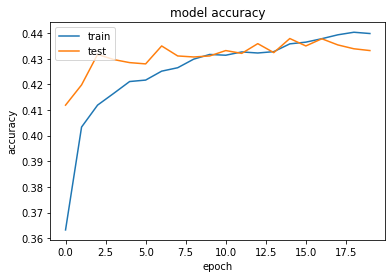

In [0]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

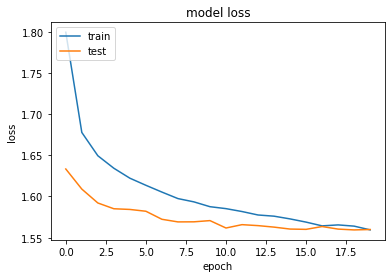

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
 # Install virtualenv system-wide
! pip install virtualenv

!pip install --upgrade wandb


import wandb
wandb.init(sync_tensorboard=True)
